In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv("Advertising.csv")

In [67]:
df.head(5)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [68]:
X = df.drop('sales',axis = 1)

In [69]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [70]:
y = df['sales']

In [71]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [122]:
from sklearn.preprocessing import PolynomialFeatures

In [73]:
polynomial_converter = PolynomialFeatures(degree = 2 , include_bias= False)

In [74]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [75]:
poly_features = polynomial_converter.transform(X)

In [76]:
polynomial_converter.transform(X).shape

(200, 9)

In [77]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [78]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [79]:

230.1*37.8

8697.779999999999

In [80]:
37.8*69.2

2615.7599999999998

In [81]:
230.1*69.2

15922.92

In [82]:
230.1**2

52946.009999999995

In [83]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
poly_features.shape

(200, 9)

In [86]:
 X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
model = LinearRegression()

In [89]:
model.fit(X_train,y_train)

LinearRegression()

In [90]:
test_predictions = model.predict(X_test)

In [91]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [93]:
MAE = mean_absolute_error(y_test,test_predictions)

In [94]:
MSE = mean_squared_error(y_test, test_predictions)

In [95]:
RMSE = np.sqrt(MSE)

In [96]:
MAE , MSE , RMSE

(0.4896798044803488, 0.4417505510403312, 0.6646431757268942)

In [97]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [98]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [99]:
X.iloc[0] # FIRST three Beta Coeff

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [100]:
69.2**2

4788.64

### Создать различные степени полинома / Create different degrees of polynoms
### Разбить данные на обучающий и тестовый наборы данных / Separate data to train data set and test data set
### Обучить модель / Train the model
### Сохранить метрики RMSE для обучающего и тестового наборов данных / Save RMSE metrics for train and test data sets
### Нарисовать график с результатами - ошибка по степеням полинома / Draw the plot with final results  - polynomial degree error

In [150]:
train_rmse_errors = []
test_rmse_errors= []

for d in range (1,10):
    poly_converter = PolynomialFeatures(degree = d, include_bias= False)
    poly_features = poly_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train , y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train , train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test , test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
        

In [151]:
train_rmse_errors

[1.7345941243293759,
 0.5879574085292232,
 0.4339344356902067,
 0.3517083688399347,
 0.25093429451233085,
 0.1934278097421558,
 5.422368782402398,
 0.14505198696186963,
 0.16704892185716372]

In [152]:
test_rmse_errors

[1.5161519375993882,
 0.6646431757268942,
 0.5803286825226185,
 0.5077742648398241,
 2.5758238588318223,
 4.382573556772669,
 1377.9931160321764,
 4894.148331028541,
 93341.68460818131]

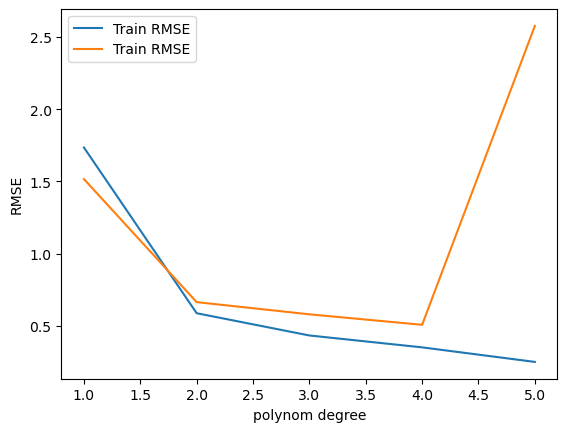

In [153]:
plt.plot(range(1,6),train_rmse_errors[:5],label = 'Train RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label = 'Train RMSE')
plt.xlabel("polynom degree")
plt.ylabel("RMSE")
plt.legend()

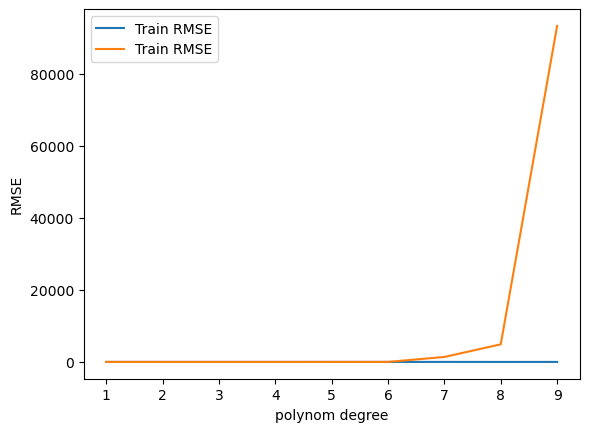

In [154]:
plt.plot(range(1,10),train_rmse_errors,label = 'Train RMSE')
plt.plot(range(1,10),test_rmse_errors,label = 'Train RMSE')
plt.xlabel("polynom degree")
plt.ylabel("RMSE")
plt.legend()

In [157]:
final_poly_converter = PolynomialFeatures(degree = 3 , include_bias=False)


In [158]:
final_model = LinearRegression()

In [160]:
final_model.fit(final_poly_converter.fit_transform(X),y)

LinearRegression()

In [161]:
from joblib import dump,load

In [162]:
dump(final_model, 'sales_poly_model.joblib') 

['sales_poly_model.joblib']

In [163]:
dump(final_poly_converter,'poly_converter.joblib')

['poly_converter.joblib']

### Saving and uploading model  -> testing this model with another data set

In [170]:
loaded_poly = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

In [171]:
campaign = [[149,22,12]]

In [172]:
campaign_poly = loaded_poly.transform(campaign)

/Users/ataikenesbekov/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [173]:
campaign_poly

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [174]:
final_model.predict(campaign_poly)

array([14.64501014])